# **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

In [10]:
%matplotlib inline
%pprint off

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm

from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage import io 
from skimage.transform import rescale


Pretty printing has been turned OFF


## 5.1 Morphological operations 

**Q.1** Using morphological operations functions build in skimage [`morphology module`](http://scikit-image.org/docs/dev/api/skimage.morphology.html) and structuring element of [`disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) apply **erosion, dilation, opening and closing** morphological operations on `FindingContours.png` image, using disk ratio of $r \in [1, 10, 20]$

**Note** use io.imshow to show the image rather than plt.

** Q.1.1 Erosion**

In [11]:
import skimage
from skimage import exposure
contours_im=io.imread('./images/FindingContours.png','True')

Text(0.5,1,'Eroded r =20')

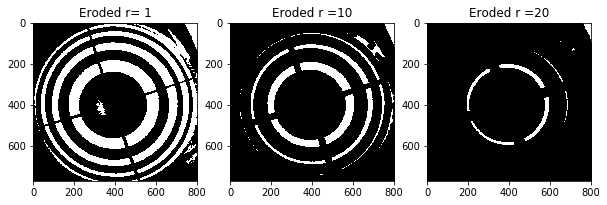

In [12]:
from skimage.morphology import square
from skimage.morphology import disk

eroded1 = skimage.morphology.erosion(contours_im , disk(1))
eroded2 = skimage.morphology.erosion(contours_im , disk(10))
eroded3 = skimage.morphology.erosion(contours_im , disk(20))

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
ax0, ax1 ,ax2 = axes.ravel()

ax0.imshow(eroded1 , cmap = cm.gray)
ax0.set_title("Eroded r= 1" )

ax1.imshow(eroded2 , cmap = cm.gray)
ax1.set_title("Eroded r =10" )

ax2.imshow(eroded3 , cmap = cm.gray)
ax2.set_title("Eroded r =20" )


** Q.1.2 Dilation **

Text(0.5,1,'Dilated r =20')

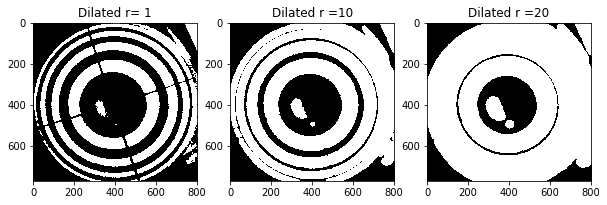

In [13]:
dilated1 = skimage.morphology.dilation(contours_im , disk(1))
dilated2 = skimage.morphology.dilation(contours_im , disk(10))
dilated3 = skimage.morphology.dilation(contours_im , disk(20))

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
ax0, ax1 ,ax2 = axes.ravel()

ax0.imshow(dilated1 , cmap = cm.gray)
ax0.set_title("Dilated r= 1" )

ax1.imshow(dilated2 , cmap = cm.gray)
ax1.set_title("Dilated r =10" )

ax2.imshow(dilated3 , cmap = cm.gray)
ax2.set_title("Dilated r =20" )


** Q.1.3 Opening **

Text(0.5,1,'Opened r =20')

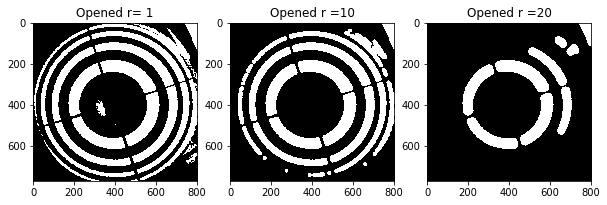

In [14]:
opened1 = skimage.morphology.opening(contours_im , disk(1))
opened2 = skimage.morphology.opening(contours_im , disk(10))
opened3 = skimage.morphology.opening(contours_im , disk(20))

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
ax0, ax1 ,ax2 = axes.ravel()

ax0.imshow(opened1 , cmap = cm.gray)
ax0.set_title("Opened r= 1" )

ax1.imshow(opened2 , cmap = cm.gray)
ax1.set_title("Opened r =10" )

ax2.imshow(opened3 , cmap = cm.gray)
ax2.set_title("Opened r =20" )

** Q.1.4 Closing**

Text(0.5,1,'Closed r =20')

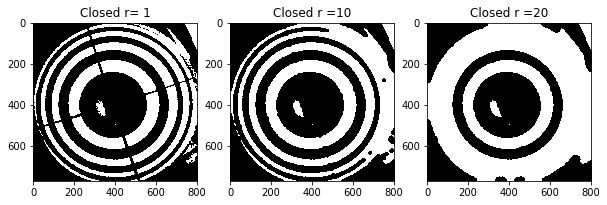

In [15]:
closed1 = skimage.morphology.closing(contours_im , disk(1))
closed2 = skimage.morphology.closing(contours_im , disk(10))
closed3 = skimage.morphology.closing(contours_im , disk(20))

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
ax0, ax1 ,ax2 = axes.ravel()

ax0.imshow(closed1 , cmap = cm.gray)
ax0.set_title("Closed r= 1" )

ax1.imshow(closed2 , cmap = cm.gray)
ax1.set_title("Closed r =10" )

ax2.imshow(closed3 , cmap = cm.gray)
ax2.set_title("Closed r =20" )

** Q.2 ** Explain what is the difference between erosion, dilation, opening and closing ? 

## 5.2 segmentation

### 5.2.1  Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore: 

**1-** read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

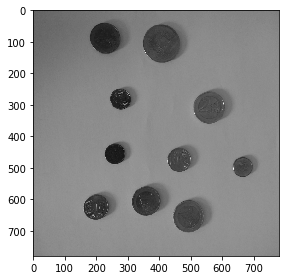

In [17]:
from scipy import misc
## Module util from skimage 

coins_im=io.imread('./images/coins.jpg','True')
coins_im = misc.imresize (coins_im , 25 , interp="bicubic" )

coins_im = img_as_ubyte(coins_im)
io.imshow(coins_im)
 

**2-** Threshold the image using a global Otsu's thresholding (check `skimage.filters`) after converting the image into gray scale. Display the thresholded image.

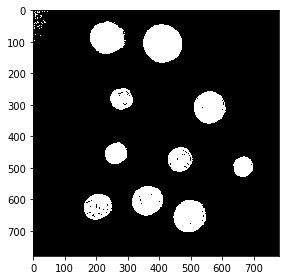

In [18]:
from skimage import filters

coin_thresh = filters.threshold_otsu(coins_im)
binary_coin = coins_im <= coin_thresh
io.imshow(binary_coin)

**3-** Clean the  thresholded image using some morphological operations, i.e. erosion, dilation, opening, closing ...

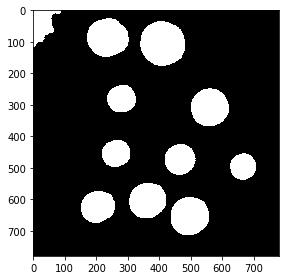

In [19]:
from skimage.morphology import disk
from skimage.filters.rank import mean

coin = mean(binary_coin ,disk(10))
second_binary = coin >= 0.75

closed_coin = skimage.morphology.closing(second_binary , disk(10))
io.imshow(closed_coin)

**4-** Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image using `circle_perimeter` from `skimage.draw`


C:\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


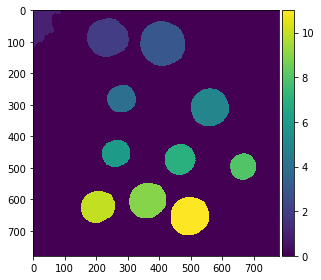

In [20]:

from skimage import measure
coin_labeled , lables= skimage.measure.label(closed_coin , background= 0 ,return_num= True)
io.imshow(coin_labeled)

In [23]:
from skimage.draw import circle_perimeter

regions =skimage.measure.regionprops(coin_labeled)

print ('The number of regions is: {}'.format(len(regions)))



The number of regions is: 12


The radius of the region is: 63 pxs
The radius of the region is: 71 pxs
The radius of the region is: 44 pxs
The radius of the region is: 60 pxs
The radius of the region is: 44 pxs
The radius of the region is: 48 pxs
The radius of the region is: 41 pxs
The radius of the region is: 58 pxs
The radius of the region is: 52 pxs
The radius of the region is: 61 pxs
The radius of the region is: 37 pxs


C:\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


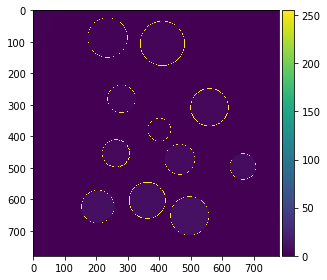

In [24]:
for i ,region in enumerate(regions):
    if i == 0:
        continue;
    radius = region.equivalent_diameter /2.
    print ('The radius of the region is: {:.0f} pxs'.format(radius))
    circle = circle_perimeter(int(region.centroid[0]) , int(region.centroid[1]), int(radius))
    coin_labeled[circle[0] , circle[1]] = 255

plt.figure()


io.imshow(coin_labeled)


### 5.2.2 Segmentation of markers

**Q.3** Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 

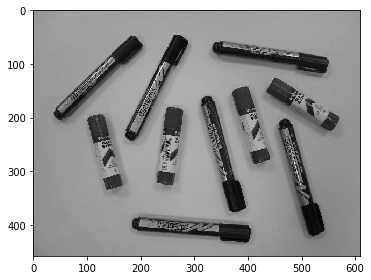

In [27]:
object_im=io.imread('./images/objets4.jpg','True')
#object_im = misc.imresize (object_im , 25 , interp="bicubic" )

io.imshow(object_im)

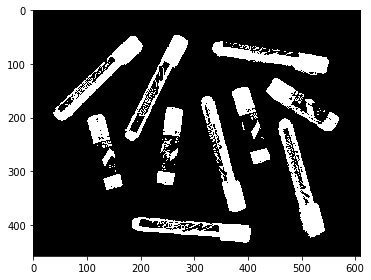

In [28]:
object_thresh = filters.threshold_otsu(object_im)
binary_object = object_im < object_thresh
io.imshow(binary_object)

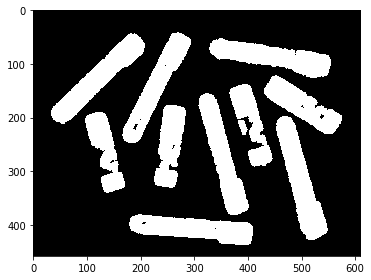

In [29]:
closed_object = skimage.morphology.dilation(binary_object, disk(5))
io.imshow(closed_object)

C:\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


10


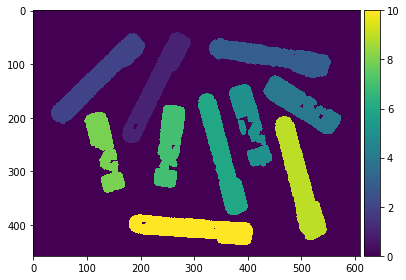

In [30]:
obj_labeled , obj_lables= skimage.measure.label(closed_object, background= 0 ,return_num= True)
io.imshow(obj_labeled)
print (obj_lables)

C:\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


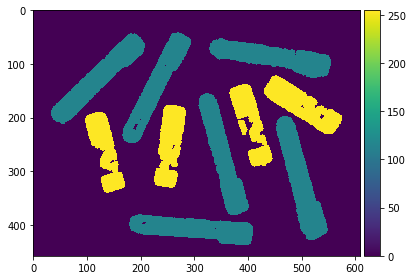

In [31]:
from skimage.draw import ellipse_perimeter

obj_regions =skimage.measure.regionprops(obj_labeled)
detected_obj = 0;

for i ,region in enumerate(obj_regions):

    long_axis = region.major_axis_length /2.
    short_axis = region.minor_axis_length /2.
    coords = region.coords
    
    if long_axis < 126:
        
        for x,y in coords:
            obj_labeled[x, y] = 255;
    else:
        for x,y in coords:
            obj_labeled[x, y] = 115;
   
plt.figure()

io.imshow(obj_labeled)